In [1]:
from sklearn.cluster import KMeans
import numpy as np
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [2]:
img=Image.open('ravi.jpg')

In [3]:
img_np=np.asarray(img)
img_np.shape

(363, 647, 3)

In [4]:
pixels=img_np.reshape(img_np.shape[0]*img_np.shape[1],img_np.shape[2])

In [5]:
pixels.shape

(234861, 3)

In [7]:
model=KMeans(n_clusters=16)
model.fit(pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=16, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [9]:
pixels_centroids=model.labels_
cluster_centers=model.cluster_centers_
pixels_centroids

array([7, 7, 7, ..., 5, 5, 5])

In [10]:
final=np.zeros((pixels_centroids.shape[0],3))

In [11]:
final.shape

(234861, 3)

In [13]:
for cluster_no in range(16):
    final[pixels_centroids==cluster_no]=cluster_centers[cluster_no]
final[0:5]

array([[187.72070679, 154.82230812, 122.82915516],
       [187.72070679, 154.82230812, 122.82915516],
       [187.72070679, 154.82230812, 122.82915516],
       [147.81757115, 120.77426198,  92.57892876],
       [147.81757115, 120.77426198,  92.57892876]])

In [14]:
comp_image=final.reshape(img_np.shape[0],img_np.shape[1],3)
comp_image.shape

(363, 647, 3)

In [15]:
comp_image=Image.fromarray(np.uint8(comp_image))

In [16]:
comp_image.save('ravi1.jpg')

In [18]:
fname='ravi.jpg'
fname1='ravi1.jpg'
img1=mpimg.imread(fname,0)
img2=mpimg.imread(fname1,0)

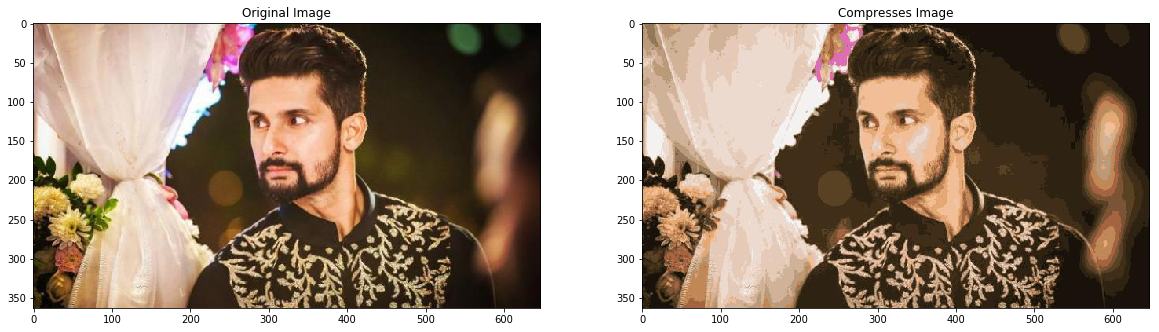

In [24]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,20))
ax1.imshow(img1)
ax1.set_title('Original Image')
ax2.imshow(img2)
ax2.set_title('Compresses Image')
plt.show()

In [25]:
import os
print('size of original image',int(os.stat('ravi.jpg').st_size/1024),'kB')
print('size of compressed image',int(os.stat('ravi1.jpg').st_size/1024),'kB')

size of original image 35 kB
size of compressed image 37 kB
